# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

In [22]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


Описание данных: 
    
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

Так как для проведения исследования зависимостей в данных, нужно ответить на ряд однотипных вопросов, то некоторые рутинные операции можно сразу вынести в функцию.

In [23]:
def ratio(column):
    '''функция подсчета вероятности задолженности в процентах'''
    return str(round((column.sum() / column.count()) * 100, 2)) + '%'

Также для визуализации результатов импортируем нужные библиотеки.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=2,
        style='whitegrid',
        rc={'figure.figsize': (16, 8)})

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [25]:
# построим сводную таблицу для ответа на вопрос и отсортируем по вероятности задолженности

data_pivot = data.pivot_table(index=['children'], values=["debt"], aggfunc=['sum', 'count', ratio])
data_pivot = data_pivot.sort_values(by=('ratio', 'debt'))
data_pivot

,sum,count,ratio
,debt,debt,debt
children,,,
5,0,9,0.0%
0,1063,14091,7.54%
3,27,330,8.18%
1,444,4808,9.23%
2,194,2052,9.45%
4,4,41,9.76%


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


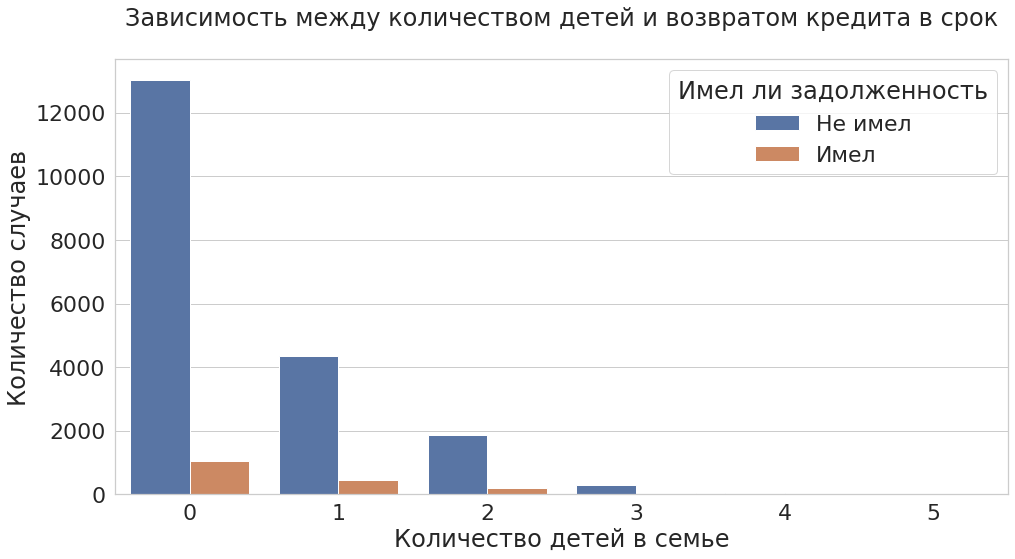

In [26]:
# визуализируем полученные результаты

ax = sns.countplot(data['children'], hue=data['debt'])

ax.set_title('Зависимость между количеством детей и возвратом кредита в срок\n')
ax.set_xlabel('Количество детей в семье')
ax.set_ylabel('Количество случаев')
plt.legend(title='Имел ли задолженность', loc='upper right', labels=['Не имел', 'Имел']);

**Вывод:** 

Наличие даже одного ребенка увеличивает вероятность задолженности по сравнению с отсутствием детей у клиента на 1.7 пп.: 9.2% против 7.5% соответственно. Тенденция сохраняется и для большего количества детей (кроме 3х).
Клиентов с 5 детьми всего 9 человек (около 0.04% от общего числа), поэтому достоверные выводы об этой группе сделать нельзя, выборка слишком мала.

По предварительным данным, самыми надежными заемщиками являются клиенты без детей.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [27]:
# построим сводную таблицу для ответа на вопрос и отсортируем по вероятности задолженности

data_pivot = data.pivot_table(index=['family_status'], values=["debt"], aggfunc=['sum', 'count', ratio])
data_pivot = data_pivot.sort_values(by=('ratio', 'debt'))
data_pivot

,sum,count,ratio
,debt,debt,debt
family_status,,,
вдовец / вдова,63,951,6.62%
в разводе,84,1189,7.06%
женат / замужем,927,12261,7.56%
гражданский брак,385,4134,9.31%
Не женат / не замужем,273,2796,9.76%


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


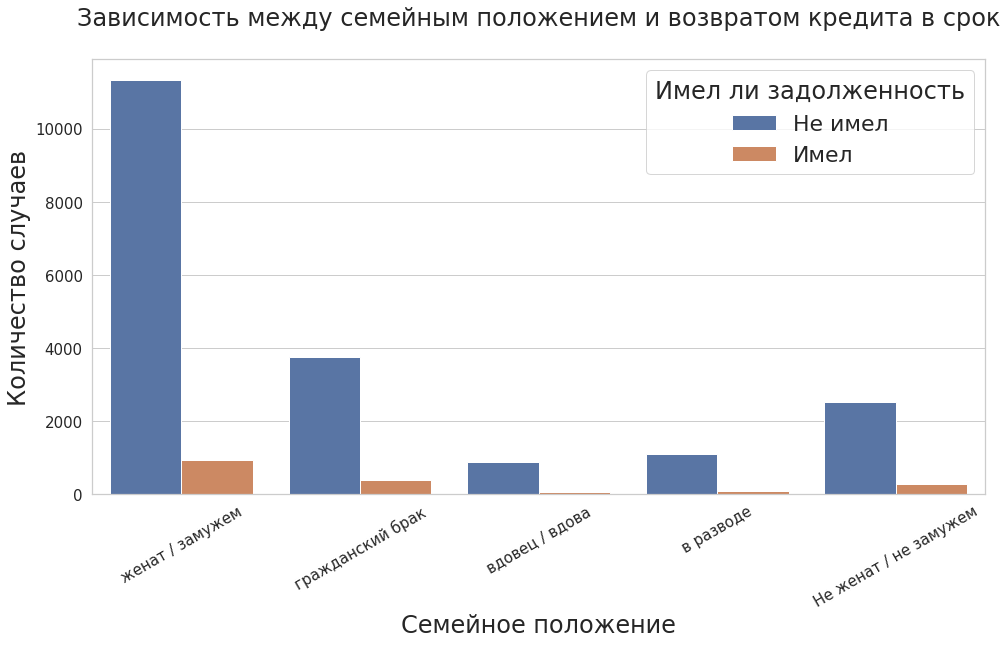

In [28]:
# визуализируем полученные результаты

ax = sns.countplot(data['family_status'], hue = data['debt'])

ax.set_title('Зависимость между семейным положением и возвратом кредита в срок\n')
ax.set_xlabel('Семейное положение')
ax.set_ylabel('Количество случаев')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Имел ли задолженность', loc='upper right', labels=['Не имел', 'Имел']);

**Вывод:** 

По предварительным данным, самыми надежными клиентами являются клиенты, которые находятся/находились в официальном браке. Их вероятность задолжать по кредиту меньше на 1.7-3.1 пп., чем у клиентов, которые не состоят/не состояли в зарегистрированных отношениях. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [29]:
# для удобства отображения значений создадим словарик соответствий

income_dict = {'E': 'до 30 т.р.', 
               'D': 'от 30 до 50 т.р.', 
               'C': 'от 50 до 200 т.р.', 
               'B': 'от 200 т.р. до 1 млн.р.', 
               'A': 'свыше 1 млн.р.'}

In [30]:
# построим сводную таблицу для ответа на вопрос и отсортируем по вероятности задолженности

data_pivot = data.pivot_table(index=['total_income_category'], values=["debt"], aggfunc=['sum', 'count', ratio]).reset_index()
data_pivot['total_income_category'] = data_pivot['total_income_category'].map(income_dict)
data_pivot = data_pivot.sort_values(by=('ratio', 'debt'))
data_pivot

,total_income_category,sum,count,ratio
,,debt,debt,debt
3,от 30 до 50 т.р.,21,349,6.02%
1,от 200 т.р. до 1 млн.р.,354,5014,7.06%
0,свыше 1 млн.р.,2,25,8.0%
2,от 50 до 200 т.р.,1353,15921,8.5%
4,до 30 т.р.,2,22,9.09%


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


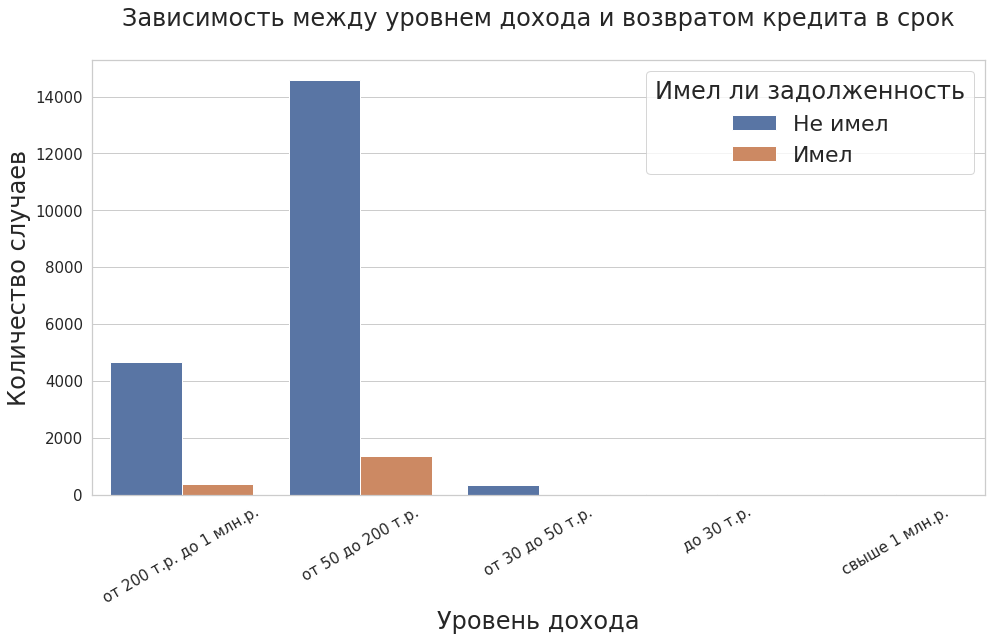

In [31]:
ax = sns.countplot(data['total_income_category'].map(income_dict),  hue = data['debt'])

ax.set_title('Зависимость между уровнем дохода и возвратом кредита в срок\n')
ax.set_xlabel('Уровень дохода')
ax.set_ylabel('Количество случаев')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Имел ли задолженность', loc='upper right', labels=['Не имел', 'Имел']);

In [32]:
# посмотрим на распределение клиентов по категориям доходов

data['total_income_category'].map(income_dict).value_counts(normalize=True) * 100

от 50 до 200 т.р.          74.637851
от 200 т.р. до 1 млн.р.    23.505696
от 30 до 50 т.р.            1.636116
свыше 1 млн.р.              0.117200
до 30 т.р.                  0.103136
Name: total_income_category, dtype: float64

In [33]:
# оценим характеристики распределения по уровню доходов

data['total_income'].describe()

count    2.133100e+04
mean     1.653427e+05
std      9.831399e+04
min      2.066700e+04
25%      1.075070e+05
50%      1.425940e+05
75%      1.958420e+05
max      2.265604e+06
Name: total_income, dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_income'>

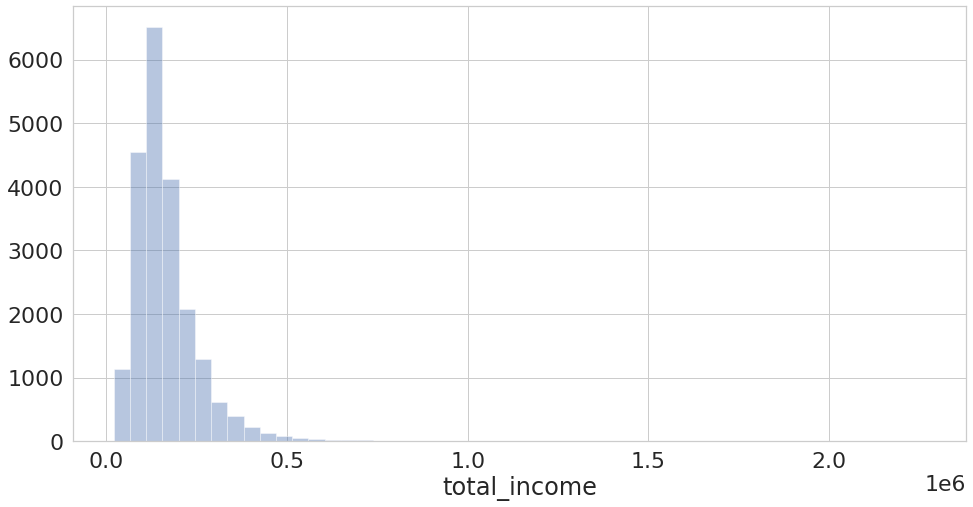

In [34]:
# построим график плотности, чтобы посмотреть на общий вид распределения признака

sns.distplot(data['total_income'], kde=False)

**Вывод:** 

Чаще всего испытывают сложности со своевременным закрытием кредита клиенты с самым низким уровнем дохода, менее 30 т.р.

Ниже всего вероятность задолженности у клиентов с уровнем доходов от 30 до 50 т.р., но и самих клиентов с такими доходами в наших данных всего 1.6%, поэтому возможно искажение статистики из-за дисбаланса классов.

Также судя по длинному хвосту графика выше, в наших данных есть выбросы, искажающие статистику, распределение напоминает равномерное только в определенном диапазоне. 

Стоит отметить, что вероятность задолжать по кредиту нелинейно зависит от уровня дохода: группы с доходами до 30 т.р. и свыше 1 млн.р. отличаются всего на 1 пп., то есть здесь не работает принцип чем выше доход, тем больше мы можем доверять заёмщику.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [35]:
data_pivot = data.pivot_table(index=['purpose_category'], values=["debt"], aggfunc=['sum', 'count', ratio])
data_pivot = data_pivot.sort_values(by=('ratio', 'debt'))
data_pivot

,sum,count,ratio
,debt,debt,debt
purpose_category,,,
операции с недвижимостью,780,10751,7.26%
проведение свадьбы,183,2313,7.91%
получение образования,369,3988,9.25%
операции с автомобилем,400,4279,9.35%


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


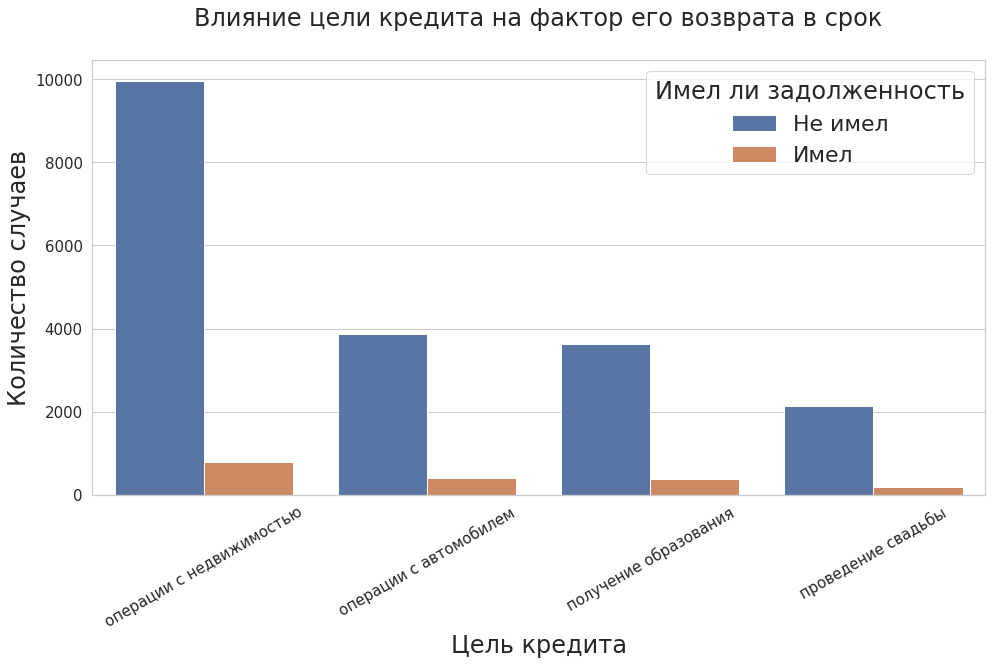

In [36]:
ax = sns.countplot(data['purpose_category'],  hue = data['debt'])

ax.set_title('Влияние цели кредита на фактор его возврата в срок\n')
ax.set_xlabel('Цель кредита')
ax.set_ylabel('Количество случаев')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.legend(title='Имел ли задолженность', loc='upper right', labels=['Не имел', 'Имел'])

**Вывод:** 

Самая низкая вероятность задолженности у клиентов, которые берут кредит на операции с недвижимостью (на 2.1 - 0.6 пп. ниже остальных категорий). 

Кредиты на получение образования и автокредитование относятся к более рискованным, в среднем вероятность их возврата в срок на 1.7 пп. меньше, чем по кредитам на прочие нужды.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Пропуски в данных могут быть вызваны несколькими главными причинами:

- человеческим фактором, 
- техническими сбоями или ошибками при выгрузке данных,
- методологией сбора данных.

Все пропуски сосредоточены в колонках с указанием общего трудового стажа в днях и ежемесячного дохода. Хотя эта информация важна для принятия банком решения о выдаче кредита, по всей видимости, она либо не является обязательной для самостоятельного заполнения клиентом, либо процесс сбора этих данных о клиенте не до конца автоматизирован (возможно, данные поступают из разных источников). 

К сожалению, на данный момент у нас недостаточно данных для того, чтобы судить о случайном характере наличия данных пропущенных значений, и этот вопрос требует дальнейшего исследования.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Распределение количественной случайной величины характеризуеся такими мерами центральной тенденции, как мода, медиана и среднее значение. При этом медиана (она же 50% квантиль) дает наиболее объективную оценку "середины" распределения: 50% выборки будут иметь значение признака меньше медианного, 50% - больше медианного. Также медиана, в отличие от среднего значения, устойчива к аномальным значениям признака (выбросам), то есть отражает истинную, несмещенную относительно экстремумов, картину. 

Таким образом, заполняя пропуски медианным значением по соответствующей категории, мы вносим минимальное искажение в распределение и можем увереннее полагаться на полученные с этими данными рассчеты.

### Шаг 4: общий вывод.

Напишите ваш общий вывод.

Мы провели исследование зависимости количества детей в семье, уровня дохода, семейного положения и целей кредитования на факт возврата кредита в срок.

На основе полученной предварительной информации можно сформировать портрет самого надежного заемщика: это человек, 

- состоящий/состоявший в официальном браке, 
- не имеющий детей, 
- с уровнем заработка 30-50 т.р., или от 200 т.р. до 1 млн.р.,
- который берет кредит на операции с недвижимостью.

В процессе принятия решения о выдаче кредита, нас должно насторожить следующее сочетание факторов:

- человек имеет 1-2 детей,
- не состоит и не состоял в зарегестрированном браке,
- имеет доход менее 30 т.р. в месяц,
- берет кредит на образовательные нужны или с целью покупки автомобиля.

Однако, чтобы строить дальнейшие гипотезы о поведении клиентов и подтвердить наличие явной корреляции между этими факторами и вероятностью возврата клиентом кредита в срок, нужно проверить статистическую значимость наших выводов, и оценить вклад "выбросов", так как одна наша выборка может быть нерепрезентативна относительно общей тенденции. 

Без строгой статистической проверки, мы можем принять неверные решения, относительно поведения клиентов, основываясь на собственных убеждениях, а не на закономерностях в данных.